In [35]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
df = sns.load_dataset('penguins')

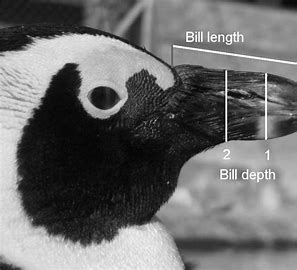

In [37]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [39]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

we are performing regression on this data. we are gonna find out body mass based on bill length , depth , filpper length.

<p style='color:purple'>regression</p> 

In [40]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm']
df[features].corrwith(df['body_mass_g']).sort_values(key=lambda x:abs(x),ascending=False)

flipper_length_mm    0.871202
bill_length_mm       0.595110
bill_depth_mm       -0.471916
dtype: float64


###  1. correlation of body mass with filpper length is positive(87%) . body mass is highly dependent on flipper length.
### 2. correlation of body mass with bill length (59%) . it means body mass positively dependent on bill length to some degree. 
### 3.  correlation of body mass with bill depth is negative (-47%) . it means when bill depth increases body mass decreases. 

In [41]:
df.drop('sex',inplace=True,axis=1)
df.dropna(inplace=True)

# we have dropped the sex column because it contained
# 11 missing values . it could affect our prediction  . 

# then we have dropped null values. 

In [42]:
for col in df:
    if df[col].dtype == 'object':
        print(df[col].unique())
# unique values of species and island column

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [43]:
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [44]:
df.isna().sum()
# no null values . lets perform regression.

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [45]:
# target .
y = df['body_mass_g']
# features
X = df.drop('body_mass_g',axis=1)


### splitting the train and test data

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=222)


* <p style='color:darkgreen'> seperate pipelines will be made to process categorical and numerical features.</p>


In [47]:
num_features = ['bill_length_mm','bill_depth_mm','flipper_length_mm']
categorical_features = ['species','island']

In [48]:
pipeline = ColumnTransformer([
    ('num_pipeline',StandardScaler(),num_features),
    ('category_pipeline',OneHotEncoder(),categorical_features)
    
])

In [49]:
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

#scaling 
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr  = scaler.transform(X_test_tr)


In [50]:
#linear regression
lin_model = LinearRegression()

In [51]:
lin_model.fit(X_train_tr,y_train)


LinearRegression()

In [52]:
y_hat_train = lin_model.predict(X_train_tr)
y_hat_test = lin_model.predict(X_test_tr)

In [54]:
train_accuracy = r2_score(y_train,y_hat_train)
test_accuracy  = r2_score(y_test,y_hat_test)
print("Train accuracy -> ",  train_accuracy*100,"%")
print("Test accuracy  -> ",  test_accuracy*100,"%")

Train accuracy ->  84.78386501389997 %
Test accuracy  ->  84.39343944627828 %


In [55]:
def rmse(y, y_hat): #root mean squre error.
    mse = mean_squared_error(y, y_hat)
    return np.sqrt(mse)

In [57]:
import numpy as np
print(f"Train Error -> {rmse(y_train,y_hat_train):.2f}\n Test Error-> {rmse(y_test,y_hat_test):.2f}")

Train Error -> 316.34
 Test Error-> 299.57
